In [1]:
import gc
import os
import time
import warnings
from collections import Counter
import sqlite3

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import wordcloud
from tqdm import tqdm

import dash
from dash.dependencies import Input, Output, Event
import plotly
import plotly.graph_objs as go

warnings.filterwarnings('ignore')
tqdm.pandas()
sns.set_style('whitegrid')
pd.set_option('display.max_colwidth', -1)

In [2]:
BASE_PATH = 'C:\\Projects\\Python_projects\\Covid19_Analysis\\twitter_db'

In [29]:
csv_list = os.listdir(f'{BASE_PATH}\\kaggle_data')
csv_list

['COVID19_line_list_data.csv',
 'COVID19_open_line_list.csv',
 'covid_19_data.csv',
 'time_series_covid_19_confirmed.csv',
 'time_series_covid_19_confirmed_US.csv',
 'time_series_covid_19_deaths.csv',
 'time_series_covid_19_deaths_US.csv',
 'time_series_covid_19_recovered.csv']

In [47]:
covid_data = pd.read_csv(f"{BASE_PATH}\\kaggle_data\\covid_19_data.csv")

In [48]:
covid_data.shape, covid_data.columns

((11614, 8),
 Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
        'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
       dtype='object'))

In [49]:
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [50]:
covid_data["ObservationDate"] = pd.to_datetime(covid_data["ObservationDate"])
covid_data["Last Update"] = pd.to_datetime(covid_data["Last Update"])

In [51]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11614 entries, 0 to 11613
Data columns (total 8 columns):
SNo                11614 non-null int64
ObservationDate    11614 non-null datetime64[ns]
Province/State     6128 non-null object
Country/Region     11614 non-null object
Last Update        11614 non-null datetime64[ns]
Confirmed          11614 non-null float64
Deaths             11614 non-null float64
Recovered          11614 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 726.0+ KB


In [52]:
cl_list = [k for k, _ in Counter(covid_data["Country/Region"]).most_common(150)]

In [53]:
cl_list[0]

'US'

In [62]:
dff =covid_data.groupby("ObservationDate").agg({"Confirmed":"sum", "Deaths": "sum", "Recovered": "sum"}).reset_index()

In [72]:
ma = {"a":1, "b":2, "c":3}
pd.DataFrame(ma, index=[0])

,a,b,c
0,1,2,3


In [64]:
dff.tail()

,ObservationDate,Confirmed,Deaths,Recovered
68,2020-03-30,782365.0,37582.0,164566.0
69,2020-03-31,857487.0,42107.0,178034.0
70,2020-04-01,932605.0,46809.0,193177.0
71,2020-04-02,1013157.0,52983.0,210263.0
72,2020-04-03,1095917.0,58787.0,225796.0


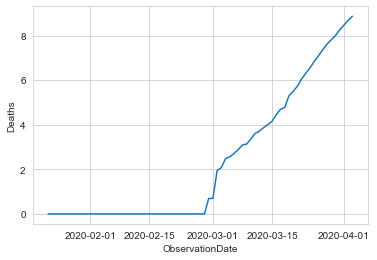

In [44]:
sns.lineplot(x=dff["ObservationDate"], y=np.log1p(dff["Deaths"]))

In [76]:
int(dff.iloc[-1,1])

1095917.0

## SQL df

In [26]:
conn = sqlite3.connect(
                f"{BASE_PATH}//twitter_data.db",
                isolation_level=None,
                check_same_thread=False
            )

In [27]:
df = pd.read_sql(f"SELECT * FROM covid ORDER BY id DESC LIMIT 20", conn)

In [28]:
df.head(4)

,id,id_str,tweet,created_at,user_location,user_name,screen_name,verified,sentiment
0,286,1246343447126183936,"Covid-19 to cut Asian growth to 2.2%, Thailand -4.8% (ADB) - https://t.co/HF2goCmpy0...",Sat Apr 04 07:46:48 +0000 2020,Cambodia,Cambodia Property,cambodia_home,0,0.0
1,285,1246343447151144960,Saturday feels like an extended weekday?\nJazz up your playlist.\n\n#HereForYou #COVID19 #WorkFromHome #SocialDistancing,Sat Apr 04 07:46:48 +0000 2020,,Select CITYWALK,SelectCITYWALK,1,0.0
2,284,1246343447084068865,@vivekagnihotri Sir retweet,Sat Apr 04 07:46:48 +0000 2020,,Krishna Chandra Mishra,Krishna42696556,0,0.0
3,283,1246343446958399488,"Top story: Coronavirus Australia: Qantas and Jetstar confirm around 50 staff infected with COVID-19 | https://t.co/SWomtpkscI https://t.co/Cbul9sACti, see more https://t.co/63wUhmQ85W",Sat Apr 04 07:46:48 +0000 2020,"Melbourne, Victoria",Samy Angel,SamyAngel4o,0,0.5


In [78]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = int(dff.iloc[-1,1]),
    domain = {'x': [0, 0.5], 'y': [0, 0.5]},
    delta = {'reference': int(dff.iloc[-2,1]), 'relative': True, 'position' : "top"}))
fig.show()

In [79]:
import plotly.graph_objects as go # or plotly.express as px
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = int(dff.iloc[-1,1]),
    domain = {'x': [0, 0.5], 'y': [0, 0.5]},
    delta = {'reference': int(dff.iloc[-2,1]), 'relative': True, 'position' : "top"}))

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

Running on http://127.0.0.1:8050/
Debugger PIN: 716-877-683
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


Traceback (most recent call last):
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 2463, in __call__
    return self.wsgi_app(environ, start_response)
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 2449, in wsgi_app
    response = self.handle_exception(e)
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 1866, in handle_exception
    reraise(exc_type, exc_value, tb)
  File "c:\projects\virtual_env\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\projects\virtual_env\lib\site-packages\f

Traceback (most recent call last):
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 2463, in __call__
    return self.wsgi_app(environ, start_response)
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 2449, in wsgi_app
    response = self.handle_exception(e)
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 1866, in handle_exception
    reraise(exc_type, exc_value, tb)
  File "c:\projects\virtual_env\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\projects\virtual_env\lib\site-packages\f

Traceback (most recent call last):
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 2463, in __call__
    return self.wsgi_app(environ, start_response)
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 2449, in wsgi_app
    response = self.handle_exception(e)
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 1866, in handle_exception
    reraise(exc_type, exc_value, tb)
  File "c:\projects\virtual_env\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\projects\virtual_env\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "c:\projects\virtual_env\lib\site-packages\f